
# 🎨 Color Detector



In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

In [13]:

#  Upload an image (or use local fallback)
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(widgets.HTML('<b>Upload an image to analyze (or provide a local path in code):</b>'))
display(uploader)

def load_image():
    img = None
    if uploader.value:
        uploaded_filename = list(uploader.value.keys())[0]
        content = uploader.value[uploaded_filename]['content']
        arr = np.frombuffer(content, dtype=np.uint8)
        img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        print('Loaded uploaded image:', uploaded_filename)
    else:
        # Fallback example path (edit if running locally)
        path = "sample_image.jpg"
        img = cv2.imread(path)
        if img is not None:
            print("Loaded fallback image:", path)
    return img

def show_img_bgr(img, title="Image"):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()


HTML(value='<b>Upload an image to analyze (or provide a local path in code):</b>')

FileUpload(value={}, accept='image/*', description='Upload')

Loaded uploaded image: image.jpg


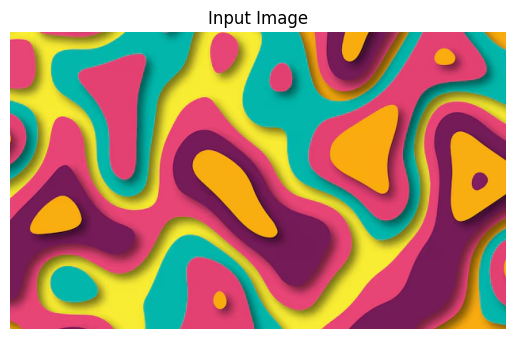

In [18]:

# ▶️ Load and show input image
img = load_image()
if img is not None:
    show_img_bgr(img, "Input Image")
else:
    print("⚠️ No image loaded. Upload or set fallback path.")

In [19]:

#  Extract dominant colors using KMeans clustering
def extract_colors(img, k=5):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    reshaped = img_rgb.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reshaped)
    centers = kmeans.cluster_centers_.astype(int)

    _, counts = np.unique(labels, return_counts=True)
    return centers, counts

if img is not None:
    centers, counts = extract_colors(img, k=5)
    print("Extracted Colors (RGB):", centers)


Extracted Colors (RGB): [[223  67 113]
 [161 142  34]
 [  6 171 160]
 [117  29  82]
 [238 201  36]]


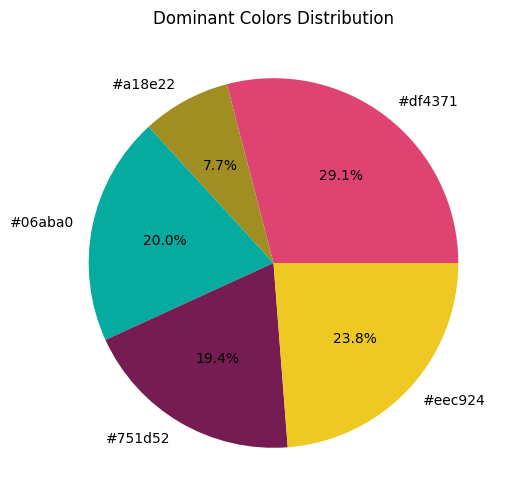

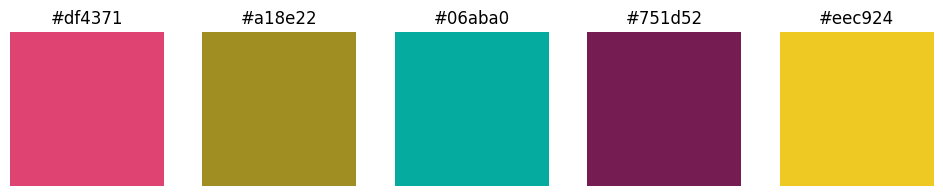

In [20]:

#  Visualize dominant colors
def plot_palette(centers, counts):
    hex_colors = ['#%02x%02x%02x' % tuple(c) for c in centers]
    total = sum(counts)

    # Pie chart
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=hex_colors, colors=hex_colors, autopct='%1.1f%%')
    plt.title("Dominant Colors Distribution")
    plt.show()

    # Color swatches
    plt.figure(figsize=(12,2))
    for i, c in enumerate(centers):
        plt.subplot(1, len(centers), i+1)
        plt.imshow([[c/255]])
        plt.axis("off")
        plt.title(hex_colors[i])
    plt.show()

if img is not None:
    plot_palette(centers, counts)


In [21]:

#  Show colors in RGB, HEX, HSV with simple names
import colorsys

def rgb_to_hsv(rgb):
    return tuple(round(i*100,1) for i in colorsys.rgb_to_hsv(rgb[0]/255, rgb[1]/255, rgb[2]/255))

basic_names = {
    "Red": (255,0,0), "Green": (0,255,0), "Blue": (0,0,255),
    "Black": (0,0,0), "White": (255,255,255), "Yellow": (255,255,0),
    "Cyan": (0,255,255), "Magenta": (255,0,255), "Gray": (128,128,128)
}

def closest_color(rgb):
    min_dist = float("inf")
    name = None
    for cname, cval in basic_names.items():
        dist = np.linalg.norm(np.array(rgb) - np.array(cval))
        if dist < min_dist:
            min_dist, name = dist, cname
    return name

if img is not None:
    print("Detected Colors:")
    for c in centers:
        hex_c = '#%02x%02x%02x' % tuple(c)
        hsv_c = rgb_to_hsv(c)
        print(f"RGB: {tuple(c)} | HEX: {hex_c} | HSV: {hsv_c} | Name: {closest_color(c)}")


Detected Colors:
RGB: (np.int64(223), np.int64(67), np.int64(113)) | HEX: #df4371 | HSV: (np.float64(95.1), np.float64(70.0), np.float64(87.5)) | Name: Gray
RGB: (np.int64(161), np.int64(142), np.int64(34)) | HEX: #a18e22 | HSV: (np.float64(14.2), np.float64(78.9), np.float64(63.1)) | Name: Gray
RGB: (np.int64(6), np.int64(171), np.int64(160)) | HEX: #06aba0 | HSV: (np.float64(48.9), np.float64(96.5), np.float64(67.1)) | Name: Cyan
RGB: (np.int64(117), np.int64(29), np.int64(82)) | HEX: #751d52 | HSV: (np.float64(90.0), np.float64(75.2), np.float64(45.9)) | Name: Gray
RGB: (np.int64(238), np.int64(201), np.int64(36)) | HEX: #eec924 | HSV: (np.float64(13.6), np.float64(84.9), np.float64(93.3)) | Name: Yellow
